In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
x_train=images_train.reshape(50000,3072)
y_train=cls_train
x_test=images_test.reshape(10000,3072)
y_test=cls_test

In [8]:
images_train.shape,cls_train.shape,labels_train.shape
images_test.shape,cls_test.shape,labels_test.shape

((10000, 32, 32, 3), (10000,), (10000, 10))

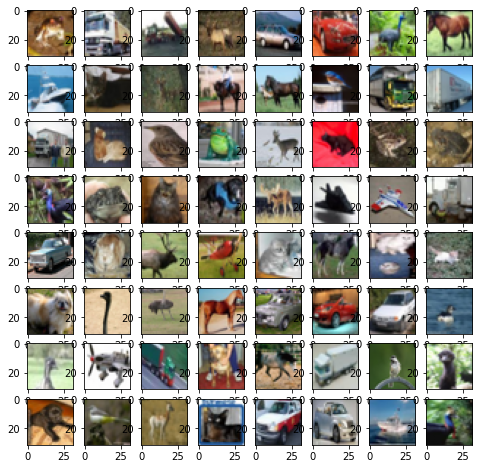

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()

# PCA:

In [9]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_train)

PCA()

In [10]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.99:
    currentSum+=pca.explained_variance_[k]
    k=k+1
k

658

In [11]:
pca_new=PCA(n_components=k,whiten=True)
x_transformed=pca_new.fit_transform(x_train)
x_transformed.shape

(50000, 658)

# Reproducing Images:

In [12]:
x_approx=pca_new.inverse_transform(x_transformed)
x_approx=x_approx.reshape((50000,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

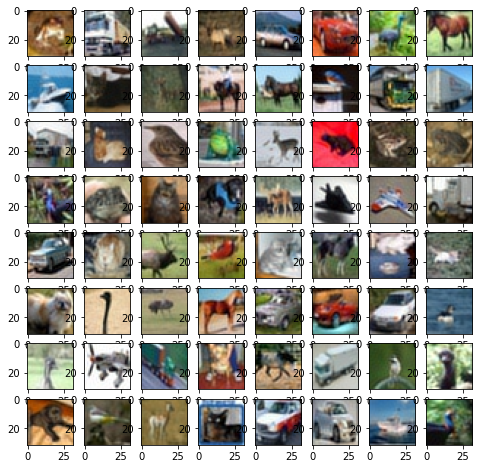

In [13]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i])
plt.show()

# Random Forest without PCA:

In [10]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import  confusion_matrix, classification_report

In [15]:
rf=RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
end=time.time()
print(end-start)
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

187.50637245178223
[[575  33  53  22  33  21  22  25 162  54]
 [ 36 562  24  37  19  29  34  32  67 160]
 [100  48 330  75 154  64 116  60  24  29]
 [ 54  43  71 290  76 181 138  58  17  72]
 [ 65  22 137  45 415  50 144  79  22  21]
 [ 35  37  82 153  84 380  86  78  33  32]
 [ 10  32  73  70 117  62 559  28   8  41]
 [ 45  50  47  65 100  84  50 450  27  82]
 [ 85  88  20  26  21  32  10  15 616  87]
 [ 45 161   8  34  24  26  19  42  83 558]]
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.52      0.56      0.54      1000
           2       0.39      0.33      0.36      1000
           3       0.35      0.29      0.32      1000
           4       0.40      0.41      0.41      1000
           5       0.41      0.38      0.39      1000
           6       0.47      0.56      0.51      1000
           7       0.52      0.45      0.48      1000
           8       0.58      0.62      0.60      1000
         

# Random Forest with PCA:

In [16]:
x_train_pca=x_transformed
x_test_pca=pca_new.transform(x_test)

In [17]:
rf2=RandomForestClassifier()
start=time.time()
rf2.fit(x_train_pca,y_train)
end=time.time()
print(end-start)
y_pred_pca=rf2.predict(x_test_pca)
print(confusion_matrix(y_test,y_pred_pca))
print(classification_report(y_test,y_pred_pca))

153.688547372818
[[501  59  57  35  20  41  28  36 167  56]
 [ 57 490  15  40  26  46  34  42  68 182]
 [122  38 253  91 181  84 101  57  37  36]
 [ 55  66 101 233  71 176 104  81  47  66]
 [ 58  29 160  90 353  69 120  63  34  24]
 [ 29  48 100 185  95 327  48  80  54  34]
 [ 22  42 106  84 132  71 435  47  18  43]
 [ 52  66  76  77  82  91  62 339  48 107]
 [133  94  22  41  19  40  20  28 532  71]
 [ 52 232  14  47  19  36  46  57  91 406]]
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      1000
           1       0.42      0.49      0.45      1000
           2       0.28      0.25      0.27      1000
           3       0.25      0.23      0.24      1000
           4       0.35      0.35      0.35      1000
           5       0.33      0.33      0.33      1000
           6       0.44      0.43      0.44      1000
           7       0.41      0.34      0.37      1000
           8       0.49      0.53      0.51      1000
           

# Decision Tree:

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
start=time.time()
dt.fit(x_train,y_train)
end=time.time()
print(end-start)
y_pred=dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

160.09220099449158
[[335  67  87  53  67  56  35  53 164  83]
 [ 70 270  69  84  62  59  51  56 108 171]
 [101  45 218  92 145 111 110  88  40  50]
 [ 65  62 114 179 100 133 130  97  51  69]
 [ 63  45 166  88 230  96 114 108  43  47]
 [ 53  59 102 151  81 228 105  85  68  68]
 [ 46  45 124 132 125  95 289  67  27  50]
 [ 75  76  98  95 108 106  51 254  56  81]
 [154 101  46  48  44  45  33  38 384 107]
 [ 86 165  62  73  43  49  47  77 110 288]]
              precision    recall  f1-score   support

           0       0.32      0.34      0.33      1000
           1       0.29      0.27      0.28      1000
           2       0.20      0.22      0.21      1000
           3       0.18      0.18      0.18      1000
           4       0.23      0.23      0.23      1000
           5       0.23      0.23      0.23      1000
           6       0.30      0.29      0.29      1000
           7       0.28      0.25      0.26      1000
           8       0.37      0.38      0.37      1000
         

# SVM :

In [11]:
from sklearn.svm import SVC

In [12]:
svc=SVC(kernel="linear",degree=3,gamma="scale")

In [ ]:
start=time.time()
svc.fit(x_train,y_train)
end=time.time()
y_pred=svm.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))